In [7]:
import requests
from googleapiclient.discovery import build
import csv
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [30]:
# Loads Scout Data (all scouts)

scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)

docid = "1HZi2Clyz9yZIjA6o2-6yAG9c8IKwBvUNdn7FhIHAAmU"

client = gspread.authorize(credentials)
spreadsheet = client.open_by_key(docid)
quantitative_worksheet = spreadsheet.worksheets()[2]
qualitative_worksheet = spreadsheet.worksheets()[3]
pit_worksheet = spreadsheet.worksheets()[1]

if (not os.path.exists("Quantitative Scouts.csv")):
    filename = 'Quantitative Scouts' + '.csv'
    with open(filename, 'w', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerows(quantitative_worksheet.get_all_values())
        
if (not os.path.exists("Super Scouts.csv")):
    filename = 'Super Scouts' + '.csv'
    with open(filename, 'w', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerows(qualitative_worksheet.get_all_values())
        
if (not os.path.exists("Pit Scouts.csv")):
    filename = 'Pit Scouts' + '.csv'
    with open(filename, 'w', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerows(pit_worksheet.get_all_values())

data = pd.read_csv("Quantitative Scouts.csv")
data["Name"] = data["Name"].str.lower()

In [31]:
# Loads TBA Data
tba = requests.get("https://www.thebluealliance.com/api/v3/event/2024hop/matches", 
                   headers={"X-TBA-Auth-Key": 
                       "SMQDompbTx8rQRyED3H3kv6sDhjNhwDh9giEDrpFRhH4n3BquDGs4j4YH6bg5MwK"}).json()


In [54]:
data

,Page Header,Name,Match Number,Assignment,Robot?,Team (getting scouted),Page 2 Header,AMP Score (Auto),SPEAKER Score (Auto),Crossed Line?,...,Used Coopertition Button,AMP Score (Teleop),SPEAKER Score (Teleop),Shuttled Notes,Intook From (Full Match),Page 4 Header,TRAP Score,Climb Type,Issues,Notes
0,NaN,nisala,2,Red 3,9455,NaN,NaN,0.0,0,True,...,False,2,0,0.0,NaN,NaN,0,Solo Climb,NaN,Really really slow (see data)
1,NaN,nisala,2,Red 1,8159,NaN,NaN,0.0,3,True,...,False,0,9,0.0,Ground,NaN,0,NaN,NaN,Great shoot on the move
2,NaN,nisala,2,Red 2,5705,NaN,NaN,0.0,0,False,...,False,0,0,0.0,NaN,NaN,0,NaN,Disabled,NaN
3,NaN,fanta,4,Red 2,3310,NaN,NaN,0.0,1,True,...,True,0,3,0.0,Ground,NaN,1,Solo Climb,NaN,"Passed the notes over stage, fast."
4,NaN,leif,4,Blue 3,7712,NaN,NaN,0.0,1,True,...,True,2,0,0.0,Ground,NaN,0,Solo Climb,NaN,"The robot had a bad auto, only shot the preloa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,NaN,noah carrillo,121,Red 3,5809,NaN,NaN,0.0,2,True,...,True,2,4,0.0,Ground,NaN,0,Solo Climb,NaN,Good shots. Paused a few times on the field.
567,NaN,noah carrillo,122,Red 3,5715,NaN,NaN,0.0,1,True,...,False,6,3,0.0,Ground,NaN,0,Solo Climb,NaN,Good shooting. Had control of the amp. Overall: ✅
568,NaN,noah carrillo,123,Red 3,4270,NaN,NaN,0.0,1,False,...,True,5,8,0.0,Ground,NaN,1,Solo Climb,NaN,Was in charge of the whole game. One of the be...
569,NaN,noah carrillo,124,Red 3,1781,NaN,NaN,0.0,1,True,...,True,2,0,5.0,Ground,NaN,0,Solo Climb,NaN,Good. Nothing spectacular. Had some minor trou...


In [9]:
logs = []
def log(data):
    logs.append(data)

In [25]:
for zz in range(21):
    print(zz)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [32]:
errors = defaultdict(int)


Lscoutsgetbetterorimgoingto = []

fuckscouters = [
]
sooooooo_errors = []

# Scoring Errors
auto_amp_disc = 0
auto_speaker_disc = 0
tele_amp_disc = 0
tele_speaker_disc = 0
trap_disc = 0
climb_err = 0
cross_line_err = 0

# Error Amounts and stuff (For graphs)
num_errs = 0
matches = []
match_errors = []
match_filter = 0
total = 0
total_simple = 0

# L Scouter Stuff
shift_order = [
    "Red 1",
    "Red 2",
    "Red 3",
    "Blue 1",
    "Blue 2",
    "Blue 3"
]

shiftA = [
   "Logan",
   "Fanta",
   "Davin",
   "Lucas",
   "Coby",
   "Leif" 
]

shiftB = [
    "Luke",
    "Jazlyn",
    "Taj",
    "Jonathan",
    "Dillon",
    "Aiden"
]

shiftC = [
    "Karos",
    "Danyar",
    "Noah",
    "Freya",
    "Jalen",
    "Garys"
]


def imnotlookingupthisfunction(item, list):
    ughhhazzzz = 0
    for fuckthis in list:
        if(item == fuckthis):
            return(ughhhazzzz)
        ughhhazzzz += 1

def find_bad_scout(shift, assignment):
    if (shift == "A"):
        for aa in shiftA:
            if (imnotlookingupthisfunction(aa, shiftA) == imnotlookingupthisfunction(assignment, shift_order)):
                return(aa)
    elif (shift == "B"):
        for bb in shiftB:
            if (imnotlookingupthisfunction(bb, shiftB) == imnotlookingupthisfunction(assignment, shift_order)):
                return(bb)
    elif (shift == "C"):
        for cc in shiftC:
            if (imnotlookingupthisfunction(cc, shiftC) == imnotlookingupthisfunction(assignment, shift_order)):
                return(cc)

def find_shift(match_num):
    ughhh = ["A", "B", "C", "A", "B", "C", "A", "B", "C"]
    im_Not_Doing_allat = [0, 15, 30, 45, 60, 75, 90, 105, 125]
    L = 0
    for zz in im_Not_Doing_allat:
        if not match_num > zz:
            return(ughhh[L -1])
        L +=1
        

# What data to look at and stuff
# match_range = [1, 21]
minimum_discrepancy = 1

max_match_num = 108
# data["Match Number"].max()
# print(max_match_num)

for match in tba:
    match_number = match["match_number"]
    comp_level = match["comp_level"]
    match_good = match_number < max_match_num
    # match_over_min = match_number >= match_range[0]
    # match_under_max = match_number <= match_range[1]
    quals_match = comp_level == "qm"
    # print(match_number)
    # print(comp_level)
    # print("Match Good? " + str(match_good))
    # print("match_over_min? " + str(match_over_min))
    # print("match_under_max? " + str(match_under_max))

    if (not match_good):
        continue
    
    matches.append(match_number)
    for alliance in ["blue", "red"]:
        for team_idx in [0, 1, 2]:
            combined = f"{alliance.title()} {team_idx + 1}"
            filt = (data["Assignment"] == combined) & (
                data["Match Number"] == match_number
            )
            robots = [int(x) for x in data[filt]["Robot?"].tolist()]


            # Basic data validation
            correct_team_number = int(
                match["alliances"][alliance]["team_keys"][team_idx].removeprefix("frc")
            )
            if len(robots) == 0:
                Lscoutsgetbetterorimgoingto.append(find_bad_scout(find_shift(match_number), f"{alliance.title()} {team_idx + 1}"))
    
# print(Lscoutsgetbetterorimgoingto)

for scout in Lscoutsgetbetterorimgoingto:
    if (not scout in fuckscouters):
        fuckscouters.append(scout)

for badscout in fuckscouters:
    sooooooo_errors.append(Lscoutsgetbetterorimgoingto.count(badscout))
    
for aa in range(len(fuckscouters)):
    print(f"{fuckscouters[aa]} missed {sooooooo_errors[aa]} matches")

Lucas missed 30 matches
Coby missed 23 matches
Leif missed 18 matches
Logan missed 29 matches
Fanta missed 25 matches
Davin missed 21 matches
Jonathan missed 21 matches
Luke missed 8 matches
Jazlyn missed 12 matches
Taj missed 9 matches
Dillon missed 9 matches
None missed 50 matches
Aiden missed 8 matches


In [68]:
# List of errors
sorted_logs = sorted(logs, key=lambda x: int(x.split(":")[0]))
print("\n".join(sorted_logs))
print(len(logs))

14: Red 1 (3546) not scouted
44: Blue 2 (8188) not scouted
46: Blue 1 (6328) not scouted
46: Blue 2 (1325) not scouted
46: Blue 3 (9429) not scouted
46: Red 1 (5993) not scouted
46: Red 2 (7712) not scouted
50: Blue 1 (6647) not scouted
51: Blue 1 (9694) not scouted
51: Red 1 (8592) not scouted
53: Blue 3 (687) not scouted
54: Blue 1 (88) not scouted
56: Red 2 (7712) not scouted
61: Red 1 (4270) not scouted
62: Red 1 (195) not scouted
63: Blue 1 (302) not scouted
63: Blue 2 (4230) not scouted
63: Blue 3 (8576) not scouted
63: Red 2 (6647) not scouted
63: Red 3 (9072) not scouted
64: Blue 1 (1671) not scouted
64: Blue 2 (8891) not scouted
64: Blue 3 (9429) not scouted
64: Red 3 (2096) not scouted
65: Blue 1 (4909) not scouted
65: Blue 2 (3175) not scouted
65: Blue 3 (5895) not scouted
65: Red 2 (3310) not scouted
66: Blue 1 (8214) not scouted
66: Blue 2 (3357) not scouted
66: Blue 3 (1250) not scouted
66: Red 2 (68) not scouted
67: Blue 1 (3627) not scouted
67: Blue 2 (498) not scouted


In [56]:
errors = defaultdict(int)

# Scoring Errors
auto_amp_disc = 0
auto_speaker_disc = 0
tele_amp_disc = 0
tele_speaker_disc = 0
trap_disc = 0
climb_err = 0
cross_line_err = 0

# Error Amounts and stuff (For graphs)
num_errs = 0
matches = []
match_errors = []
match_filter = 0
total = 0
total_simple = 0

# What data to look at and stuff
# match_range = [1, 21]
minimum_discrepancy = 1

max_match_num = 108
# data["Match Number"].max()
print(max_match_num)

for match in tba:
    match_number = match["match_number"]
    comp_level = match["comp_level"]
    match_good = match_number < max_match_num
    # match_over_min = match_number >= match_range[0]
    # match_under_max = match_number <= match_range[1]
    quals_match = comp_level == "qm"
    print(match_number)
    print(comp_level)
    print("Match Good? " + str(match_good))
    # print("match_over_min? " + str(match_over_min))
    # print("match_under_max? " + str(match_under_max))

    if (not match_good):
        continue
    
    matches.append(match_number)
    for alliance in ["blue", "red"]:
        for team_idx in [0, 1, 2]:
            combined = f"{alliance.title()} {team_idx + 1}"
            filt = (data["Assignment"] == combined) & (
                data["Match Number"] == match_number
            )
            robots = [int(x) for x in data[filt]["Robot?"].tolist()]

            # Basic data validation
            correct_team_number = int(
                match["alliances"][alliance]["team_keys"][team_idx].removeprefix("frc")
            )
            if len(robots) == 0:
                log(f"{match_number}: {combined} ({correct_team_number}) not scouted")
                continue

            # if len(set(robots)) != 1:
            #     log(
            #         f"{match_number}: {combined} has different team numbers (correct: {correct_team_number}, actual: {robots})"
            #     )

            # if len(robots) != 2:
            #     log(
            #         f"{match_number}: {combined} scouted wrong number of times ({len(robots)})"
            #     )

            # Individual scouter validation
            try:
                tba_section = match["score_breakdown"][alliance]
            except TypeError:
                print("Match Didn't Load")
                continue
            crossed_line = (
                False
                if tba_section["autoLineRobot" + str(team_idx + 1)] == "No"
                else True
            )
            climbed = (
                True
                if "Stage" in tba_section["endGameRobot" + str(team_idx + 1)]
                else False
            )
            for i, row in data[filt].iterrows():
                scouter_crossed_line = row["Crossed Line?"]
                try:
                    scouter_climbed = "Climb" in row["Climb Type"]
                except TypeError:
                    scouter_climbed = False

                if scouter_crossed_line != crossed_line:
                    # log(
                    #     f"{match_number}: {combined} ({correct_team_number}) line cross should be {crossed_line}, but got {scouter_crossed_line}"
                    # )
                    cross_line_err += 1
                    num_errs += 1
                    errors[row["Name"]] += 1

                if climbed != scouter_climbed:
                    # log(
                    #     f"{match_number}: {combined} ({correct_team_number}) climb should be {climbed}, but got {scouter_climbed}"
                    # )
                    climb_err += 1
                    num_errs += 1
                    errors[row["Name"]] += 1
                total_simple += 1

            # Scouter v. scouter validation
            if len(robots) == 2:
                _data = list(data[filt].iterrows())
                s1 = _data[0][1]
                s2 = _data[1][1]
                if s1["AMP Score (Auto)"] != s2["AMP Score (Auto)"]:
                    if (
                        abs(s1["AMP Score (Auto)"] - s2["AMP Score (Auto)"])
                        >= minimum_discrepancy
                    ):
                        log(
                            f"{match_number}: {combined} ({correct_team_number}) has a amp auto discrepancy of "
                            + str(minimum_discrepancy)
                            + "+"
                        )
                        num_errs += 1
                        auto_amp_disc += 1

                if s1["AMP Score (Teleop)"] != s2["AMP Score (Teleop)"]:
                    if (
                        abs(s1["AMP Score (Teleop)"] - s2["AMP Score (Teleop)"])
                        >= minimum_discrepancy
                    ):
                        log(
                            f"{match_number}: {combined} ({correct_team_number}) has a amp teleop discrepancy of "
                            + str(minimum_discrepancy)
                            + "+"
                        )
                        num_errs += 1
                        tele_amp_disc += 1

                if s1["SPEAKER Score (Auto)"] != s2["SPEAKER Score (Auto)"]:
                    if (
                        abs(s1["SPEAKER Score (Auto)"] - s2["SPEAKER Score (Auto)"])
                        >= minimum_discrepancy
                    ):
                        log(
                            f"{match_number}: {combined} ({correct_team_number}) has a speaker auto discrepancy of "
                            + str(minimum_discrepancy)
                            + "+"
                        )
                        num_errs += 1
                        auto_speaker_disc += 1

                if s1["SPEAKER Score (Teleop)"] != s2["SPEAKER Score (Teleop)"]:
                    if (
                        abs(s1["SPEAKER Score (Teleop)"] - s2["SPEAKER Score (Teleop)"])
                        >= minimum_discrepancy
                    ):
                        log(
                            f"{match_number}: {combined} ({correct_team_number}) has a speaker teleop discrepancy of "
                            + str(minimum_discrepancy)
                            + "+"
                        )
                        num_errs += 1
                        tele_speaker_disc += 1

                if s1["TRAP Score"] != s2["TRAP Score"]:
                    if abs(s1["TRAP Score"] - s2["TRAP Score"]) >= minimum_discrepancy:
                        log(
                            f"{match_number}: {combined} ({correct_team_number}) has a TRAP discrepancy of {str(minimum_discrepancy)}+"
                        )
                        num_errs += 1
                        trap_disc += 1
                total += 1
    match_errors.append(num_errs)
    num_errs = 0

print("# climb errs: " + str(climb_err))
print("# cross line errs: " + str(cross_line_err))
print(f"# Tele Speaker Errors: {(tele_speaker_disc)}")

57
1
qm
Match Good? True
10
qm
Match Good? True
100
qm
Match Good? False
101
qm
Match Good? False
102
qm
Match Good? False
103
qm
Match Good? False
104
qm
Match Good? False
105
qm
Match Good? False
106
qm
Match Good? False
107
qm
Match Good? False
108
qm
Match Good? False
109
qm
Match Good? False
11
qm
Match Good? True
110
qm
Match Good? False
111
qm
Match Good? False
112
qm
Match Good? False
113
qm
Match Good? False
114
qm
Match Good? False
115
qm
Match Good? False
116
qm
Match Good? False
117
qm
Match Good? False
118
qm
Match Good? False
119
qm
Match Good? False
12
qm
Match Good? True
120
qm
Match Good? False
121
qm
Match Good? False
122
qm
Match Good? False
123
qm
Match Good? False
124
qm
Match Good? False
125
qm
Match Good? False
13
qm
Match Good? True
14
qm
Match Good? True
15
qm
Match Good? True
16
qm
Match Good? True
17
qm
Match Good? True
18
qm
Match Good? True
19
qm
Match Good? True
2
qm
Match Good? True
20
qm
Match Good? True
21
qm
Match Good? True
22
qm
Match Good? True
23
q

In [58]:
# Scouter Grades
scouter_grades = []
formated_grades = []
scouter_number_grade = 0
letter_grades = [["A+", 98], ["A", 90], ["B", 80], ["C", 70], ["D", 60], ["F", 50]]

def number_grade_to_letter(number_grade):
    for grade in letter_grades:
        if number_grade < grade[1]:
            continue
        else:
            return grade[0]
    return "F-"

for scouter in data["Name"].unique():
    scouter_entries = data["Name"].value_counts()[scouter]
    if scouter_entries < 10:
        continue
    scouter_number_grade = (1 - (errors[scouter] / (scouter_entries * 2))) * 100
    if scouter_number_grade < 0:
        scouter_number_grade = 0
    scouter_grades.append(
        [
            scouter,
            errors[scouter],
            number_grade_to_letter(scouter_number_grade),
            scouter_number_grade,
            scouter_entries
        ]
    )
scouter_grades.sort(key=lambda x: -x[3])

for scouter in scouter_grades:
    # It's not really accurate but whatever, just comment out climb part or cross line part when looking at stuff ig
    formated_grades.append(
        scouter[0]
        + " made "
        + str(scouter[1])
        + " error(s) and got an "
        + scouter[2]
        + str(f" ({round(scouter[3], 2)}% of entries were correct)")
        + str(f" out of {scouter[4]} matches")
    )
print("\n".join(formated_grades))

jazlyn made 0 error(s) and got an A+ (100.0% of entries were correct) out of 23 matches
aiden made 1 error(s) and got an A+ (98.61% of entries were correct) out of 36 matches
lucas made 1 error(s) and got an A (97.92% of entries were correct) out of 24 matches
luke made 1 error(s) and got an A (97.83% of entries were correct) out of 23 matches
dillon made 1 error(s) and got an A (97.73% of entries were correct) out of 22 matches
nisala made 1 error(s) and got an A (97.62% of entries were correct) out of 21 matches
freya made 1 error(s) and got an A (96.88% of entries were correct) out of 16 matches
yussuf made 1 error(s) and got an A (96.15% of entries were correct) out of 13 matches
taj made 2 error(s) and got an A (95.83% of entries were correct) out of 24 matches
noah carrillo made 3 error(s) and got an A (95.0% of entries were correct) out of 30 matches
logan made 5 error(s) and got an A (93.75% of entries were correct) out of 40 matches
coby made 4 error(s) and got an A (93.75% of

<BarContainer object of 2 artists>

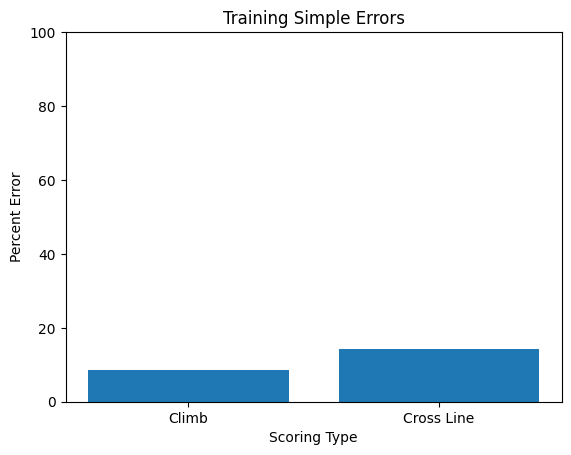

In [59]:
# Percentage of Climb/Cross Line Errors
pre_training_err = {
    "Climb": (climb_err / total_simple) * 100,
    "Cross Line": (cross_line_err / total_simple) * 100,
}
plt.gca().set_ylim([0, 100])
plt.title("Training Simple Errors")
plt.xlabel("Scoring Type")
plt.ylabel("Percent Error")
plt.bar(pre_training_err.keys(), pre_training_err.values())

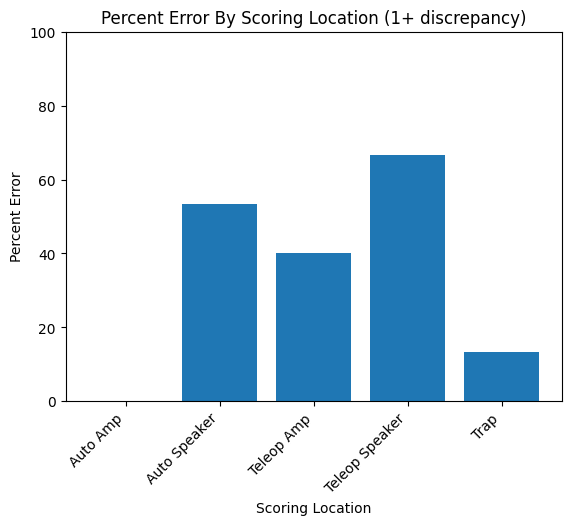

In [60]:
# Percent error of entries by scoring location
noteScoringDF = {
    "Auto Amp": (auto_amp_disc / total) * 100,
    "Auto Speaker": (auto_speaker_disc / total) * 100,
    "Teleop Amp": (tele_amp_disc / total) * 100,
    "Teleop Speaker": (tele_speaker_disc / total) * 100,
    "Trap": (trap_disc / total) * 100,
}

plt.bar(noteScoringDF.keys(), noteScoringDF.values())
plt.xlabel("Scoring Location")
plt.ylabel("Percent Error")
plt.title(f"Percent Error By Scoring Location ({minimum_discrepancy}+ discrepancy)")
plt.gca().set_ylim([0, 100])
plt.xticks(rotation=45, ha="right")

plt.show()